# Arboles y Bosques Aleatorios

### Libreta Oficial

In [1]:
# Importamos las liberias necesarias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# Estilo plotting en R
plt.style.use('ggplot')

In [3]:
mainpath="D:/UNICAH/IA"
filename="census.csv"
fullpath=os.path.join(mainpath, filename)

In [4]:
data=pd.read_csv(fullpath)

In [5]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [6]:
data.count(0)/data.shape[0]*100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

In [7]:
# Eliminamos esta columna ya que como podemos observar existe dos identicas y pueden generar conflico
# al momento de hacer la clasificacion
del data['education_num']

In [8]:
# Mostramos los valores que son verdaderos que si ganas 50K
data[data.greater_than_50k==1].head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1


Text(0, 0.5, 'Frecuencia')

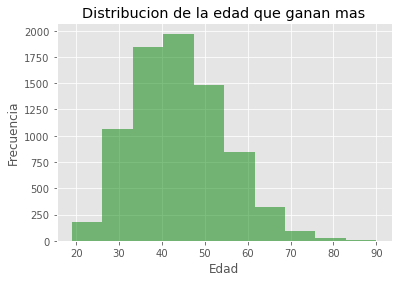

In [9]:
# Histograma que compara la edad y donde se centra las edades que ganan 50K
hist_above_50=plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribucion de la edad que ganan mas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia') 

Text(0, 0.5, 'Frecuencia')

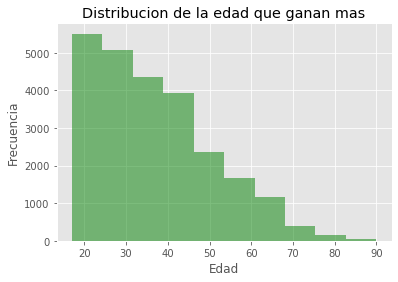

In [10]:
# Histograma que compara la edad y donde se centra las edades que ganan menos de 50K
hist_above_50=plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribucion de la edad que ganan mas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

In [11]:
# agrupamos los valores que ganan 50K dependiendo la clase de trabajo que tienen
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('workclass').workclass.count(),data[data.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1)

#Despues de agruparlas las asignamos a columnas en el dataset
dist_data.columns=['wk_class_gt50', 'wk_class_lt50']
dist_data

,wk_class_gt50,wk_class_lt50
Federal-gov,371.0,589
Local-gov,617.0,1476
Private,4963.0,17732
Self-emp-inc,622.0,494
Self-emp-not-inc,724.0,1817
State-gov,353.0,945
Never-worked,NaN,7
Without-pay,NaN,14


# Ingresos por clase de trabajo

In [12]:
# Porcentaje de ingresos por clase de trabajo
dist_data_final=dist_data.wk_class_gt50 / (dist_data.wk_class_lt50+dist_data.wk_class_gt50)

Text(0, 0.5, '% de personas')

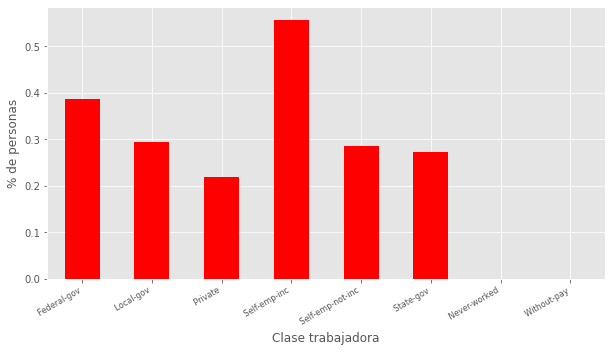

In [13]:
# Graficamos el porcentaje de ingresos por clase de trabajo
plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Clase trabajadora')
ax.set_ylabel('% de personas')

# Hipotesis de ganas mas el que tiene mejor educacion

Text(0, 0.5, '% de personas')

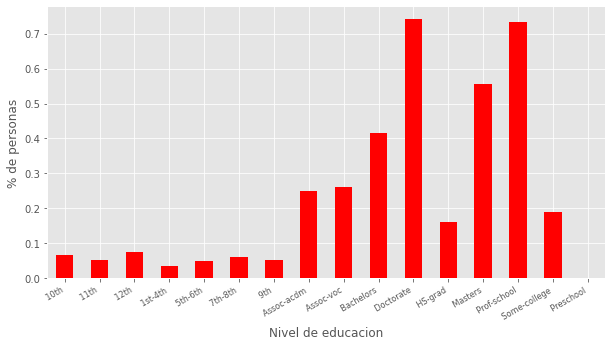

In [14]:

dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count(),data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)

dist_data.columns=['education_class_gt50', 'education_class_lt50']

dist_data_final=dist_data.education_class_gt50 / (dist_data.education_class_lt50+dist_data.education_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Nivel de educacion')
ax.set_ylabel('% de personas')

# Hipotesis de las personas casadas ganan mas dinero

Text(0, 0.5, '% de personas')

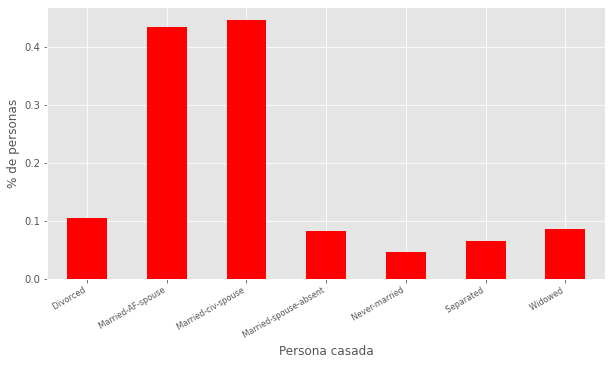

In [15]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('marital_status').marital_status.count(),data[data.greater_than_50k == 0].groupby('marital_status').marital_status.count()], axis=1)


dist_data.columns=['marital_status_class_gt50', 'marital_status_class_lt50']

dist_data_final=dist_data.marital_status_class_gt50 / (dist_data.marital_status_class_lt50+dist_data.marital_status_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Persona casada')
ax.set_ylabel('% de personas')

# Los ingresos dependen de la educacion

Text(0, 0.5, '% de personas')

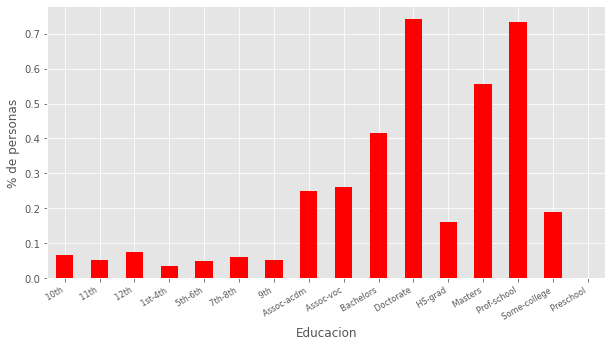

In [16]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count(),data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)


dist_data.columns=['education_class_gt50', 'education_class_lt50']

dist_data_final=dist_data.education_class_gt50 / (dist_data.education_class_lt50+dist_data.education_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Educacion')
ax.set_ylabel('% de personas')

# Hombres ganan mas

Text(0, 0.5, '% de personas')

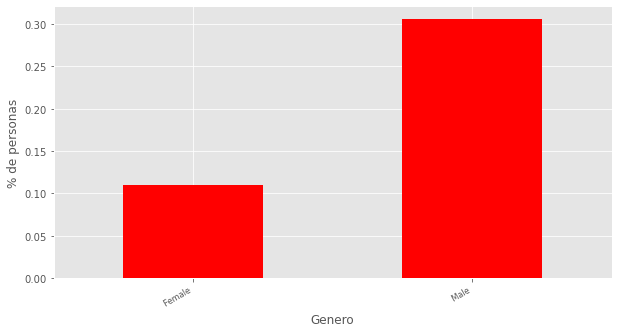

In [17]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('gender').gender.count(),data[data.greater_than_50k == 0].groupby('gender').gender.count()], axis=1)


dist_data.columns=['gender_class_gt50', 'gender_class_lt50']

dist_data_final=dist_data.gender_class_gt50 / (dist_data.gender_class_lt50+dist_data.gender_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Genero')
ax.set_ylabel('% de personas')

# Ingresos por pais

Text(0, 0.5, '% de personas')

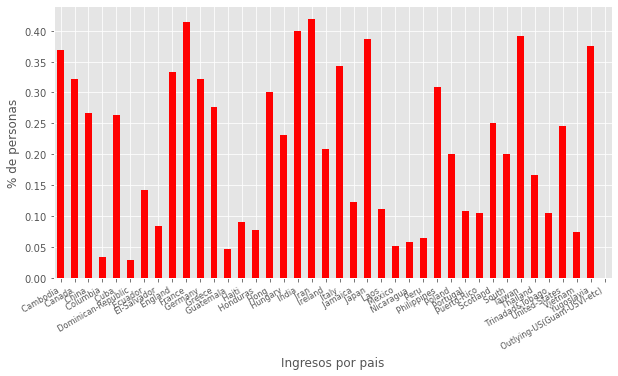

In [18]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('native_country').native_country.count(),data[data.greater_than_50k == 0].groupby('native_country').native_country.count()], axis=1)


dist_data.columns=['native_country_class_gt50', 'native_country_class_lt50']

dist_data_final=dist_data.native_country_class_gt50 / (dist_data.native_country_class_lt50+dist_data.native_country_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Ingresos por pais')
ax.set_ylabel('% de personas')

# Ingresos por raza

Text(0, 0.5, '% de personas')

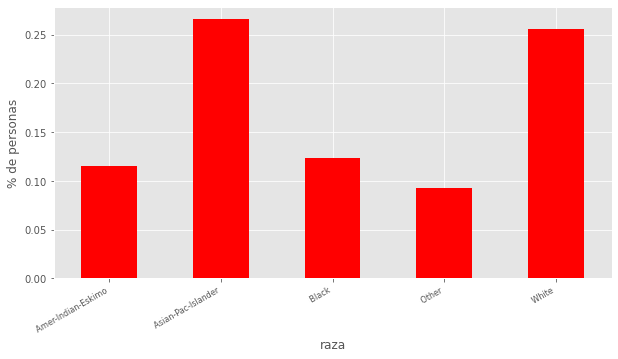

In [19]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('race').race.count(),data[data.greater_than_50k == 0].groupby('race').race.count()], axis=1)


dist_data.columns=['race_class_gt50', 'race_class_lt50']

dist_data_final=dist_data.race_class_gt50 / (dist_data.race_class_lt50+dist_data.race_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('raza')
ax.set_ylabel('% de personas')

In [20]:
data.shape

(32560, 11)

In [21]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'native_country',
       'greater_than_50k'],
      dtype='object')

In [22]:
data.groupby("workclass").workclass.count()

workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22695
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: workclass, dtype: int64

In [23]:
# Reaalizamos dummies ya que valor char no se pueden sumar 
workclass_dummies=pd.get_dummies(data.workclass, prefix='Wkc_')
workclass_dummies.drop(workclass_dummies.columns[0],axis=1,inplace=True)

# creamos una variable data para asignar los valores del data principal mas el dummie que ha sido creado 
data_census=pd.concat([data,workclass_dummies], axis=1)
data_census.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0


In [24]:
education_dummies=pd.get_dummies(data.education, prefix='educ_')
education_dummies.drop(education_dummies.columns[0],axis=1,inplace=True)
data_census1=pd.concat([data_census, education_dummies], axis=1)
data_census1.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,1,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,1,0,0,0,0,0,0


In [25]:
ocupation_dummies=pd.get_dummies(data.occupation, prefix='oc_')
ocupation_dummies.drop(ocupation_dummies.columns[0],axis=1,inplace=True)
data_census2=pd.concat([data_census1,ocupation_dummies], axis=1)
data_census2.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [26]:
marital_status_dummies=pd.get_dummies(data.marital_status, prefix='ms_')
marital_status_dummies.drop(marital_status_dummies.columns[0],axis=1,inplace=True)
data_census3=pd.concat([data_census2,marital_status_dummies], axis=1)
data_census3.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,1,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [27]:
race_dummies=pd.get_dummies(data.race, prefix='race_')
race_dummies.drop(race_dummies.columns[0],axis=1,inplace=True)
data_census4=pd.concat([data_census3,race_dummies], axis=1)
data_census4.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,1,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,1,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,1,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,1,0,0,0,0,0,1,0,0


In [28]:
gender_dummies=pd.get_dummies(data.gender, prefix='gender_')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)
data_census5=pd.concat([data_census4,gender_dummies], axis=1)
data_census5.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,gender__ Male
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,1,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,1,0,0,0,0,0,0,0,1,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,1,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,1,0,0,0,0,0,1,0,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,1,0,0,0,0,0,1,0,0,0


In [29]:
native_country_dummies=pd.get_dummies(data.native_country, prefix='nc_')
native_country_dummies.drop(native_country_dummies.columns[0],axis=1,inplace=True)
data_census6=pd.concat([data_census5,native_country_dummies], axis=1)
data_census6.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,0,0,0,0,0


In [30]:
rs_dummies=pd.get_dummies(data.relationship, prefix='rs_')
rs_dummies.drop(rs_dummies.columns[0],axis=1,inplace=True)
data_census7=pd.concat([data_census6,rs_dummies], axis=1)
data_census7.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,1,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,1,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,1,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,0,0,0,0,1


In [31]:
data_census8=pd.concat([data_census7, rs_dummies], axis=1)
data_census7.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,1,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,1,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,1,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Las caracteristicas mas importantes que hemos obtenido mediante los dummies
features = ['age','hours_per_week',
       'Wkc__ Local-gov', 'Wkc__ Never-worked', 'Wkc__ Private',
       'Wkc__ Self-emp-inc', 'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov',
       'Wkc__ Without-pay', 'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th',
       'educ__ 5th-6th', 'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college', 'ms__ Married-AF-spouse',
       'ms__ Married-civ-spouse', 'ms__ Married-spouse-absent',
       'ms__ Never-married', 'ms__ Separated', 'ms__ Widowed',
       'oc__ Armed-Forces', 'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service', 'oc__ Priv-house-serv',
       'oc__ Prof-specialty', 'oc__ Protective-serv', 'oc__ Sales',
       'oc__ Tech-support', 'oc__ Transport-moving', 'rs__ Not-in-family',
       'rs__ Other-relative', 'rs__ Own-child', 'rs__ Unmarried', 'rs__ Wife',
       'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
       'race__ White', 'gender__ Male', 'nc__ Canada', 'nc__ China',
       'nc__ Columbia', 'nc__ Cuba', 'nc__ Dominican-Republic', 'nc__ Ecuador',
       'nc__ El-Salvador', 'nc__ England', 'nc__ France', 'nc__ Germany',
       'nc__ Greece', 'nc__ Guatemala', 'nc__ Haiti', 'nc__ Honduras',
       'nc__ Hong', 'nc__ Hungary', 'nc__ India', 'nc__ Iran', 'nc__ Ireland',
       'nc__ Italy', 'nc__ Jamaica', 'nc__ Japan', 'nc__ Laos', 'nc__ Mexico',
       'nc__ Nicaragua', 'nc__ Outlying-US(Guam-USVI-etc)', 'nc__ Peru',
       'nc__ Philippines', 'nc__ Poland', 'nc__ Portugal', 'nc__ Puerto-Rico',
       'nc__ Scotland', 'nc__ South', 'nc__ Taiwan', 'nc__ Thailand',
       'nc__ Trinadad&Tobago', 'nc__ United-States', 'nc__ Vietnam',
       'nc__ Yugoslavia']

In [33]:
# Asignamos los valores feautures a X
X= data_census7[features].values

In [34]:
# Asignamos lo valores a y de la columna greather_than_50k
y=data_census8['greater_than_50k'].values

In [35]:
#Cramos lass muestras entrenamiento y preuba con 30% para prueba y 70% para entrenamiento
X_entrenamiento,X_prueba,y_entrenamiento,y_prueba=train_test_split(X,y, test_size=0.3, random_state=100)

In [36]:
#Inicializamos el algoritmo con una profundiad de 3 
clf=DecisionTreeClassifier(criterion="gini", random_state=100,max_depth=3,min_samples_leaf=5)

In [37]:
#Construimos el modelo sobre los datos de entrenamiento
clf.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [38]:
# Las caracteristicas mass importantes
clf.feature_importances_

array([0.02418128, 0.04802307, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10786365, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71714959, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10278242, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
# asignamos a la variables las caracteristicas mas importantes de la columna features
importancia=pd.DataFrame({"features":features,"importance":clf.feature_importances_})

In [44]:
# Caracteristica mas importante 
importancia.sort_values("importance",ascending=False).head()

,features,importance
25,ms__ Married-civ-spouse,0.717150
17,educ__ Bachelors,0.107864
38,oc__ Prof-specialty,0.102782
1,hours_per_week,0.048023
0,age,0.024181


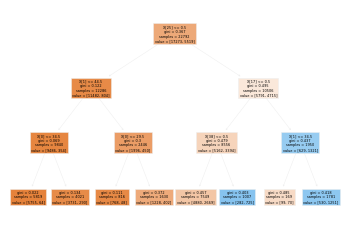

In [39]:
# Visualizamos el arbol obtenido mediante la clasificacion
plt.figure()
plot_tree(clf,filled=True)
plt.show()

In [40]:
# Realizamos la prediccion de las pruebas
y_predic=clf.predict(X_prueba)

In [41]:
# Matriz de confusion
pd.crosstab(y_prueba, y_predic, rownames=['Real'],colnames=['Prediccion'])

Prediccion,0,1
Real,,
0,7100,346
1,1500,822


In [42]:
print(classification_report(y_prueba,y_predic))

precision    recall  f1-score   support

           0       0.83      0.95      0.88      7446
           1       0.70      0.35      0.47      2322

    accuracy                           0.81      9768
   macro avg       0.76      0.65      0.68      9768
weighted avg       0.80      0.81      0.79      9768



In [45]:
# Presicion del modelo mediante la clasificacion
print("La Precision del modelo mediante la clasificacion es:",clf.score(X_entrenamiento,y_entrenamiento))

La Precision del modelo mediante la clasificacion es: 0.808924183924184


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
# Inicializamos el arbol de decision
regressor1=DecisionTreeRegressor(random_state=0,max_depth=10)

In [50]:
# Construimos el modelo
regressor1.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [51]:
# Realizamos la prediccion
y_1=regressor1.predict(X_prueba)

In [ ]:
# Visualizamos el arbol que hemos obtenido
plt.figure()
plot_tree(regressor1, feature_names=features,filled=True)
plt.show()

In [ ]:
# Precision del modelo mediante la regresion
print("La presicion obtenida del modelo es:",regressor1.score(X_entrenamiento,y_entrenamiento))

# Bosques Aleatorios De Clasificacion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import pyplot

In [2]:
#Se importan la librerias a utilizar
from sklearn.model_selection import train_test_split

In [3]:
#Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(dataset.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])



In [5]:
# verificamos la cantidad de datos
print('Cantidad de datos:')
dataset.data.shape

Cantidad de datos:


(569, 30)

In [6]:
#Verifico las características del dataset
print('Características del dataset:')
print(dataset.DESCR)

Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

In [7]:
#Seleccionamos todas las columnas
X = dataset.data

In [8]:
#Defino los datos correspondientes a las etiquetas
y = dataset.target

In [9]:
########## IMPLEMENTACIÓN DE BOSQUES ALEATORIOS CLASIFICACIÓN ##########
from sklearn.model_selection import train_test_split

In [10]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
#Defino el algoritmo a utilizar
#Bosques Aleatorios
#Entropy ganancia de informacion
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [12]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

In [14]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

In [15]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[44  1]
 [ 1 68]]


In [16]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

In [17]:
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9855072463768116


In [18]:
#Obtener la importancia de cada variable
from sklearn.ensemble import ExtraTreesClassifier

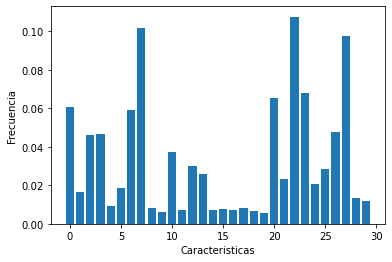

In [22]:
#Grafico de las variables y su importancia
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.xlabel("Caracteristicas")
pyplot.ylabel("Frecuencia")
pyplot.show()

In [20]:
# Cuanto ha aportado cada nuevo arbol que hemos construido.
from sklearn.metrics import accuracy_score

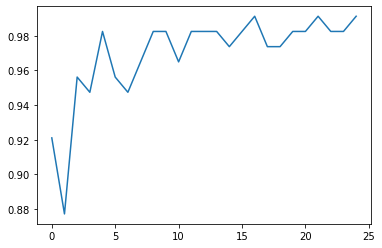

In [23]:
# grafico que nos indica si los arboles que se tuvieron que construir era suficientes o no.
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=accuracy_score(y_test, predictions)
plt.cla()
plt.plot(trees, accuracy)

# Bosques Aleatorios De Regresion

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import pyplot

In [28]:
#Se importan la librerias a utilizar
from sklearn.model_selection import train_test_split

In [29]:
#Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [30]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(dataset.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])



In [31]:
print('Cantidad de datos:')
dataset.data.shape

Cantidad de datos:


(569, 30)

In [32]:
#Verifico las características del dataset
print('Características del dataset:')
print(dataset.DESCR)

Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

In [33]:
#Seleccionamos todas las columnas
X = dataset.data

In [34]:
#Defino los datos correspondientes a las etiquetas
y = dataset.target

In [35]:
########## IMPLEMENTACIÓN DE BOSQUES ALEATORIOS Regresion ##########
from sklearn.model_selection import train_test_split

In [36]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestRegressor
algoritmo = RandomForestRegressor(n_estimators = 10)

In [40]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)